<h3> Do Graph-Level Features show how different Social Networks behave? </h3>

<p> This project is a comparative study of three different social media networks:
    <ul>
        <li> <b> Fcebook </b> : This web graph is a page-page graph of verified
                Facebook sites. Nodes represent official Facebook pages while the edges are mutual
                likes between sites. Every node of the graph contains its ID and Facebook’s ID, the
                name of the page, and the page type. The data that generates the graph were
                collected through the Facebook Graph API in November 2017 and restricted to
                pages from 4 categories which are defined by Facebook. These categories are:
                politicians, governmental organizations, television shows and companies.
                The graph contains 22470 nodes and 171002 edges
        <li> <b> GitHub </b> : Nodes are developers who have started at least 10
                repositories and edges are mutual follower relationships between them. Each node of
                the graph contains its ID, the name of the user. The data were collected from the
                public API in June 2019.
                The graph contains 37700 nodes and 289003 edges.
        <li> <b> Twitch </b> : Nodes are Twich’s users and the edges are mutual
                friendships between them. For each node ID, there is a corresponding value of days,
                mature, views, partner, and new_id. The data were collected in May 2018. The graph
                is subdivided into six connected components representing the previous information
                but within different countries.
                This graph contains 34118 nodes and 429113 edges in total.
    </ul>

We will start by studying the degree and closeness centrality, then we will focus on the study of the communities in the graphs.
    
</p>

<p> Let us first import the required libraries.
We will import at firts networkx, that contains all the algorithms on graphs. Also we will import pandas for reading the data and matplotlib for visualizing the data.
</p>

In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### Reading the graphs

We need then to read all the graphs. After that, we can compute some graph level features.

In [3]:
def read_graph(graph_path, features_path, name='G', id='id'):
    df = pd.read_csv(graph_path)
    G = nx.from_pandas_edgelist(df, source='id_1', target='id_2', create_using=nx.Graph())

    # remove self loops
    G.remove_edges_from(nx.selfloop_edges(G))

    G.name = name

    G_nodes = pd.read_csv(features_path)
    G_nodes = G_nodes.set_index(id)
    G_nodes = G_nodes.to_dict('index')

    nx.set_node_attributes(G, G_nodes)

    return G


graph_paths = {'facebook': 'facebook_large/complete/musae_facebook_edges.csv', 'git': 'git_web_ml/musae_git_edges.csv', 'twitch': 'twitch/ENGB/musae_ENGB_edges.csv'}
features_paths = {'facebook': 'facebook_large/complete/musae_facebook_target.csv', 'git': 'git_web_ml/musae_git_target.csv', 'twitch': 'twitch/ENGB/musae_ENGB_target.csv'}

Facebook = read_graph(graph_paths['facebook'], features_path=features_paths['facebook'], name='Facebook')
Git = read_graph(graph_paths['git'], features_path=features_paths['git'], name='Git')
Twitch_ENGB = read_graph(graph_paths['twitch'], features_path=features_paths['twitch'], name='Twitch_ENGB', id='new_id')

Twitch_PTBR = read_graph('twitch/PTBR/musae_PTBR_edges.csv', features_path='twitch/PTBR/musae_PTBR_target.csv', name='Twitch_PTBR', id='new_id')
tWICH_RU = read_graph('twitch/RU/musae_RU_edges.csv', features_path='twitch/RU/musae_RU_target.csv', name='Twitch_RU', id='new_id')

# print a random node to see the attributes
print(Facebook.nodes[0])
print(Git.nodes[0])
print(Twitch_ENGB.nodes[0])

{'facebook_id': 145647315578475, 'page_name': 'The Voice of China 中国好声音', 'page_type': 'tvshow'}
{'name': 'Eiryyy', 'ml_target': 0}
{'id': 181993475, 'days': 324, 'mature': True, 'views': 1678, 'partner': False}


For each graph we can print some statistics (number of nodes, number of edges, average degree, density, Clustering Coefficient)

In [4]:
def bin(n):
    return (n * (n - 1) * (n - 2)) / 2

headers = ["Graph", "Nodes", "Edges", "Avg Degree", "Density"]

Graphs = [Facebook, Git, Twitch_ENGB]
data = []
for graph in Graphs:
    data.append([graph.name, graph.number_of_nodes(), graph.number_of_edges(), sum(dict(graph.degree()).values()) / graph.number_of_nodes(), nx.density(graph)])

data.append([Twitch_PTBR.name, Twitch_PTBR.number_of_nodes(), Twitch_PTBR.number_of_edges(), sum(dict(Twitch_PTBR.degree()).values()) / Twitch_PTBR.number_of_nodes(), nx.density(Twitch_PTBR)])
data.append([tWICH_RU.name, tWICH_RU.number_of_nodes(), tWICH_RU.number_of_edges(), sum(dict(tWICH_RU.degree()).values()) / tWICH_RU.number_of_nodes(), nx.density(tWICH_RU)])

clustering_coefficients = [sum(nx.triangles(G).values()) / bin(G.number_of_nodes()) for G in Graphs] \
    + [sum(nx.triangles(Twitch_PTBR).values()) / bin(Twitch_PTBR.number_of_nodes()), sum(nx.triangles(tWICH_RU).values()) / bin(tWICH_RU.number_of_nodes())] \

df = pd.DataFrame(data, columns=headers)
df['Clustering Coefficient'] = clustering_coefficients
print(df)

         Graph  Nodes   Edges  Avg Degree   Density  Clustering Coefficient
0     Facebook  22470  170823   15.204539  0.000677            4.204763e-07
1          Git  37700  289003   15.331724  0.000407            5.865912e-08
2  Twitch_ENGB   7126   35324    9.914117  0.001391            4.854673e-07
3  Twitch_PTBR   1912   31299   32.739540  0.017132            1.491742e-04
4    Twitch_RU   4385   37304   17.014367  0.003881            5.087583e-06


<h3> Plot the graphs </h3>

<p> We now need to visualize the graphs. We generate the graph with a design such that a node's size directly correlates with its degree, meaning larger nodes correspond to higher degrees.

We can notice a lot of interesting details about the topology of each graph:
<ul>
    <li> <b> Facebook</b>: This seems to be the most connected graph. We can see also, some areas in the graph that have a very high density of edges.
    <li> <b> Git </b>: In this case the graph is less connected than Facebook. This graph contains a lot of nodes with low degree that represent small developers, and some nodes with high degree that represent important developers that partecipate with a lot of projects.
    <li> <b> Twich </b>: This graph shares some similarities with the Git graph. The main difference is that there are a small number of edges.
</ul>
</p>

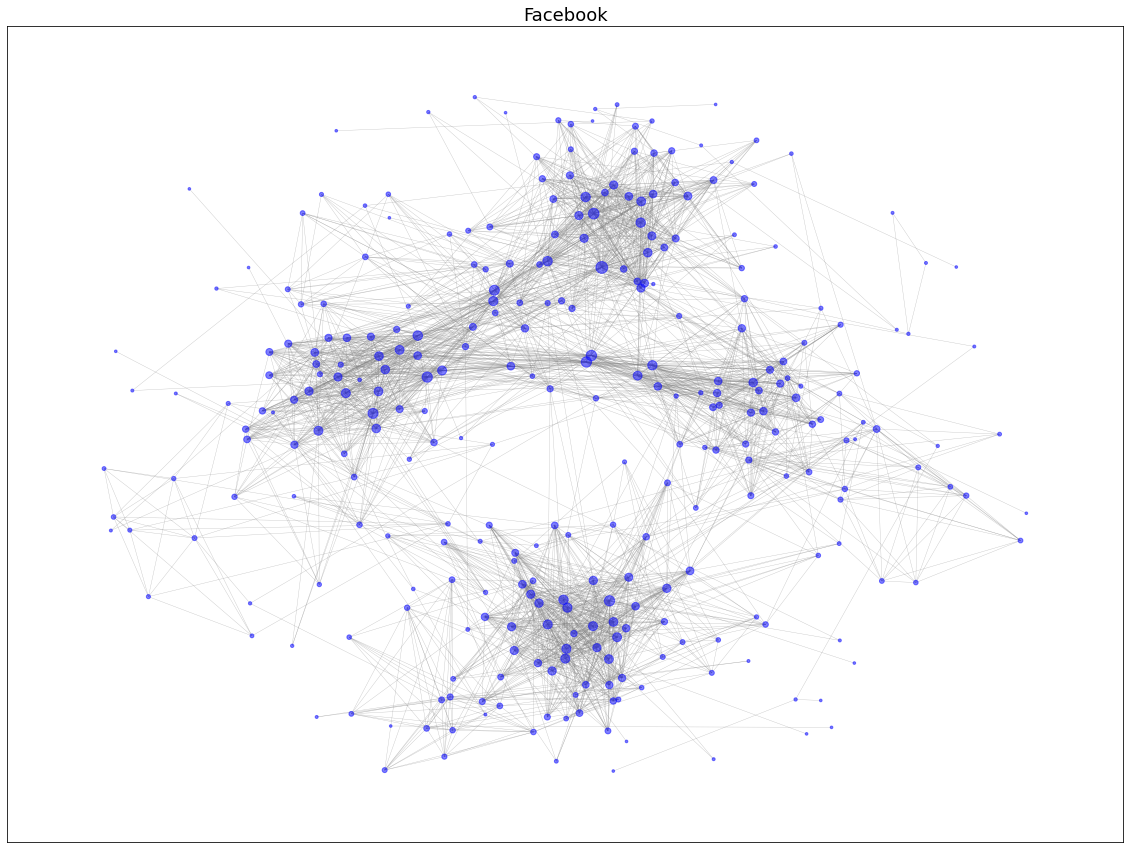

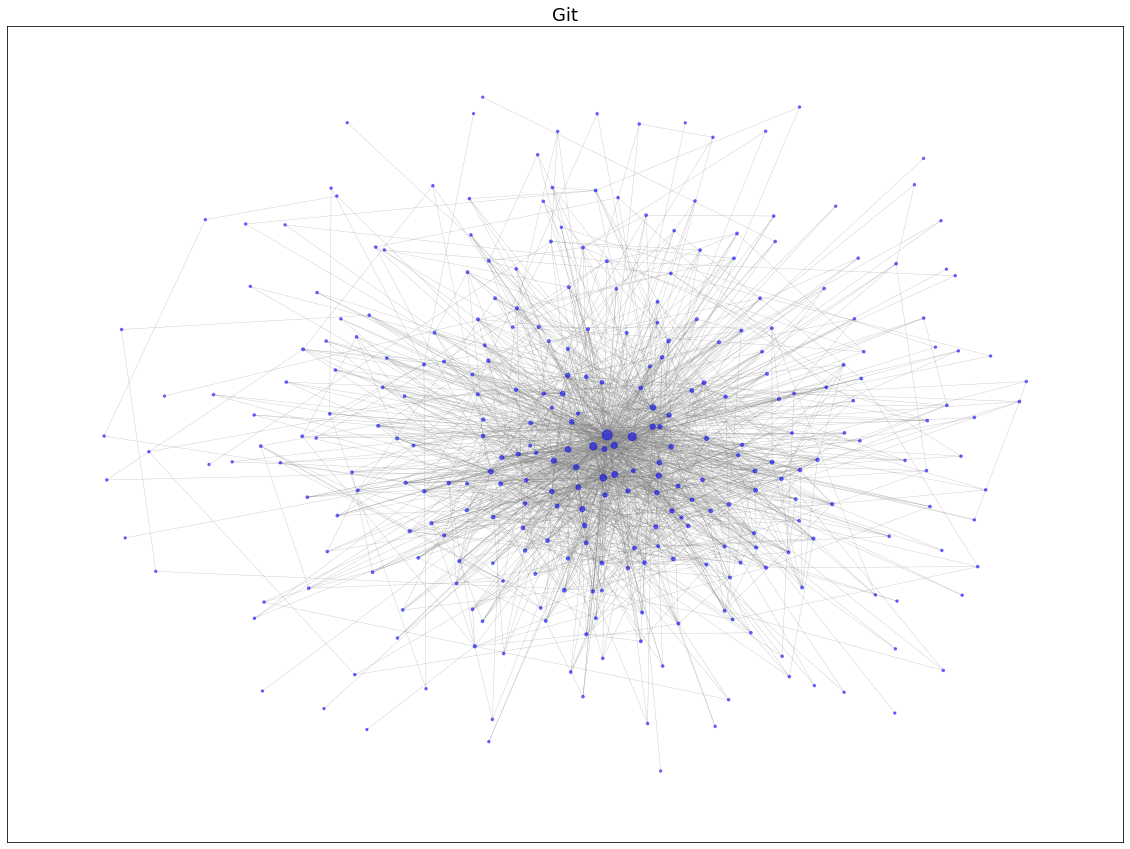

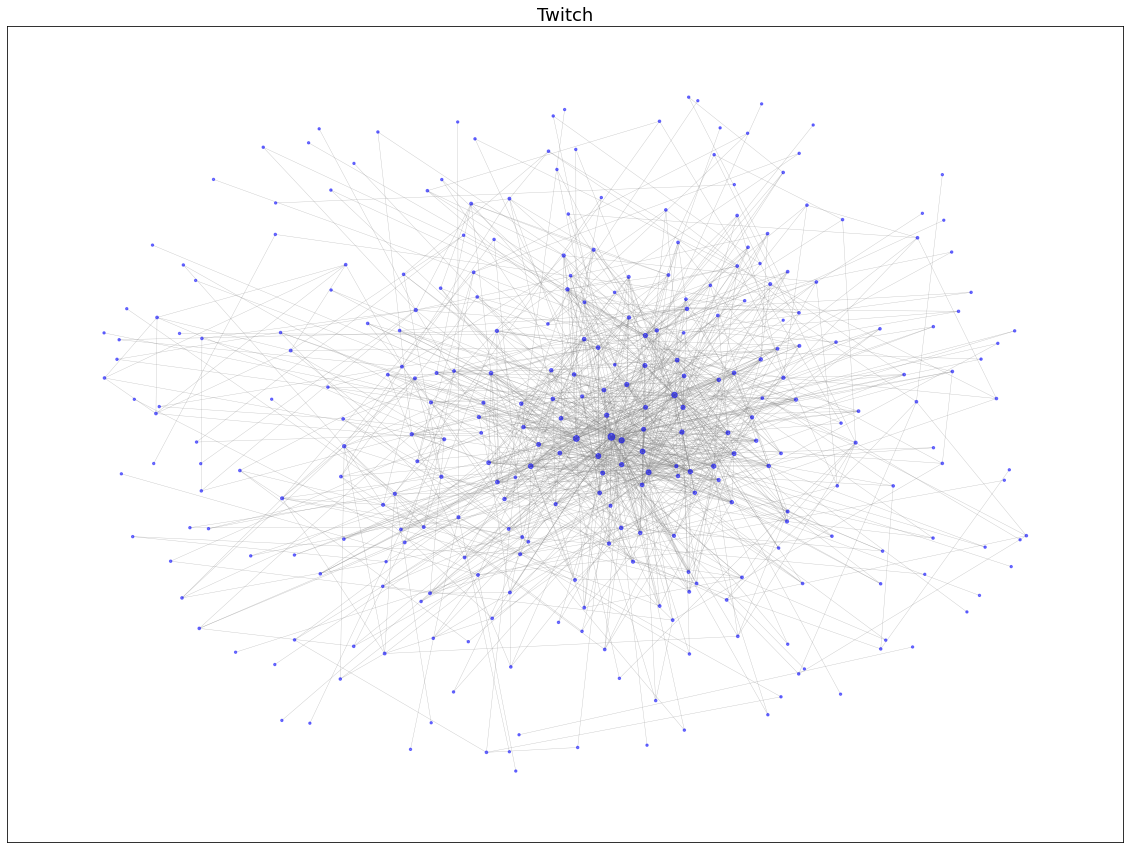

In [14]:
MINIMUM_SIZE = 5

def plot_degree_graph(F, title, size, size_multiplicator=1):
    """
    Plot a subgraph of F in whitch the node size is proportional to the degree
    :param F: the graph
    :param title: the title of the plot
    :param size: the size of the subgraph
    :param size_multiplicator: the multiplicator of the node size
    """
    G = F.subgraph(list(F.nodes())[:size])
    pos = nx.spring_layout(G, k=0.5) # get the position using the spring layout algorithm

    # set the plot parameters
    plt.rcParams['figure.figsize'] = [20, 15]

    sizes = [G.degree(node) * size_multiplicator + MINIMUM_SIZE for node in G]

    # draw the nodes and the edges (all)
    node_color = [G.degree(node) for node in G]
    nx.draw_networkx(G, pos, width=0.35, node_color='blue', edge_color='grey', with_labels=False, alpha=0.5, node_size=sizes)

    plt.title(title, fontsize=18)
    plt.axis('on')
    plt.show()

plot_degree_graph(Facebook, 'Facebook', 300, size_multiplicator=2)
plot_degree_graph(Git, 'Git', 300, size_multiplicator=0.5)
plot_degree_graph(Twitch_ENGB, 'Twitch', 300, size_multiplicator=0.5)

<h3> Node level Features </h3>

<p> Now we can Compute some simple graph statistics for each graph and then compare them. We can compute the degree centrality in order to find the edges with most degree for each graphs an compare them and the closeness centrality.

We can notice that:
<ul>
    <li> <b> Facebook</b>: The pages of type governement are the more frequent in the top 5 (both degree and closeness centrality). We can also notice that some pages like 'The White House', apperas in both top 5, meaning that they are central nodes in the graph.
    <li> <b> Git </b>: 
    <li> <b> Twich </b>: 
</ul>

</p>

In [6]:
closeness_centralities = dict()
for graph in Graphs:
    name = graph.name
    degrees = nx.degree_centrality(graph)

    top_5 = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f'Top 5 nodes with highest degree centrality in {name}:')
    for node, degree in top_5:
        print(f'Node: {graph.nodes[node]}, degree: {degree}')

    closeness = nx.closeness_centrality(graph)
    closeness_centralities[name] = closeness

    top_5 = sorted(closeness.items(), key=lambda x: x[1], reverse=True)[:5]
    print(f'\nTop 5 nodes with highest closeness centrality in {name}:')
    for node, closeness in top_5:
        print(f'Node: {graph.nodes[node]}, closeness: {closeness}')
    print('\n')

Top 5 nodes with highest degree centrality in Facebook:
Node: {'facebook_id': 44053938557, 'page_name': 'U.S. Army', 'page_type': 'government'}, degree: 0.0315545863189283
Node: {'facebook_id': 1191441824276882, 'page_name': 'The White House', 'page_type': 'government'}, degree: 0.030174907650540747
Node: {'facebook_id': 63811549237, 'page_name': 'The Obama White House', 'page_type': 'government'}, degree: 0.029329298144109662
Node: {'facebook_id': 404391086302925, 'page_name': 'U.S. Army Chaplain Corps', 'page_type': 'government'}, degree: 0.028928746272642306
Node: {'facebook_id': 155837727772692, 'page_name': 'Honolulu District, U.S. Army Corps of Engineers', 'page_type': 'government'}, degree: 0.022430904802171883

Top 5 nodes with highest closeness centrality in Facebook:
Node: {'facebook_id': 20531316728, 'page_name': 'Facebook', 'page_type': 'company'}, closeness: 0.3241578301954844
Node: {'facebook_id': 63811549237, 'page_name': 'The Obama White House', 'page_type': 'government

### Visualize the results

Now we can visualize the results. For each graph, we will plot them such that each node as a color representing its closeness centrality. Then we plot the degree and closeness centrality distribution.

For example, in Facebook we can see some areas of the graph in which the nodes involved in, present a high degree centrality. For the other two graphs, it seems to be only an area of that type with a few nodes with very high centrality.

C:\Users\Christian\AppData\Local\Temp\ipykernel_18260\2260092798.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('inferno')


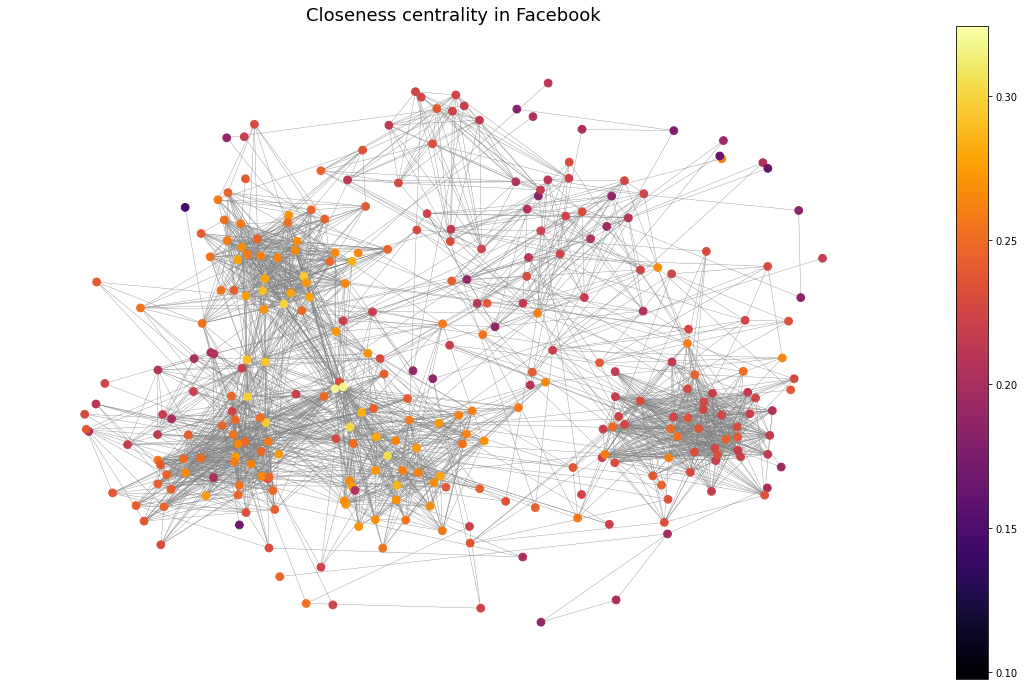

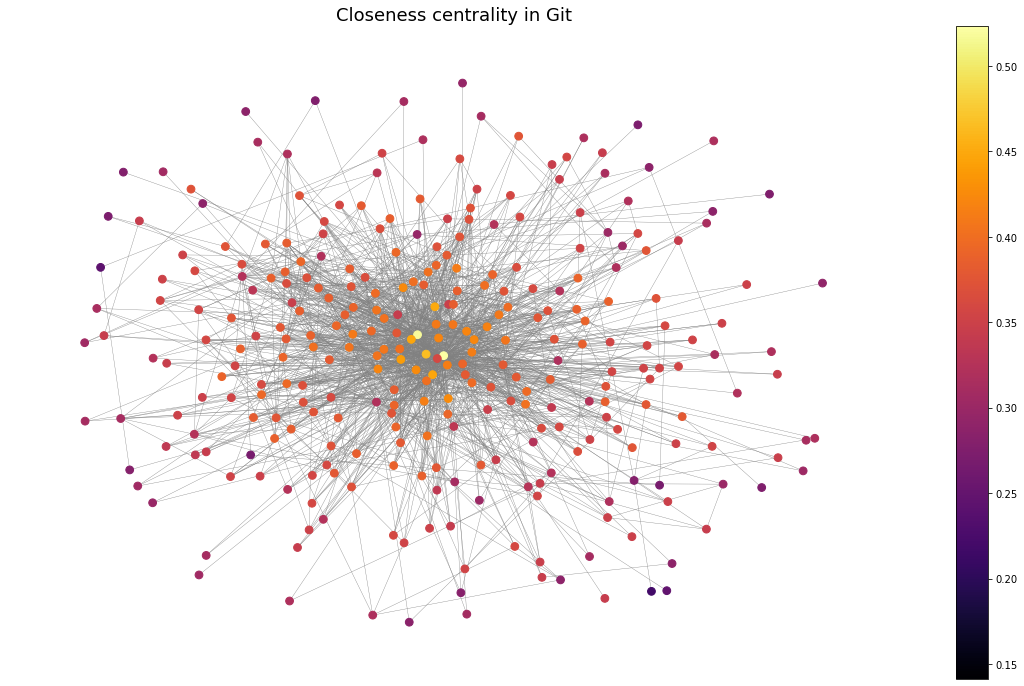

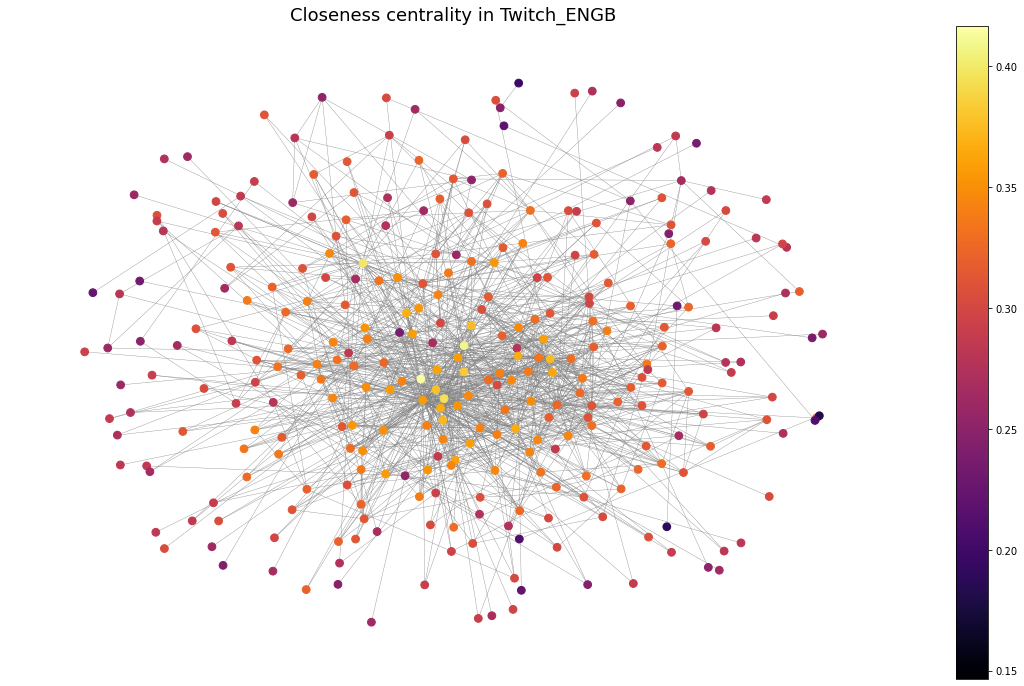

In [7]:
from matplotlib.colors import Normalize

def closeness_centrality_plot(G, title, size, closeness_centrality):
    """
    Plot a subgraph of G in which the node color is a function of the closeness centrality
    :param G: the graph
    :param title: the title of the plot
    :param size: the size of the subgraph
    """
    F = G.subgraph(list(G.nodes())[:size])
    pos = nx.spring_layout(F, k=0.5)  # get the position using the spring layout algorithm

    # set the plot parameters
    plt.rcParams['figure.figsize'] = [20, 12]

    # Choose a colormap (e.g., 'inferno') from Matplotlib
    cmap = plt.cm.get_cmap('inferno')

    # Normalize the closeness centrality values between 0 and 1
    normalized_closeness = plt.Normalize(min(closeness_centrality.values()), max(closeness_centrality.values()))

    # Use the colormap to directly create node colors
    node_color = [cmap(normalized_closeness(closeness_centrality[node])) for node in F]

    # draw the nodes and the edges (all)
    nx.draw_networkx(F, pos, width=0.35, node_color=node_color, edge_color='grey', with_labels=False, node_size=60)

    # draw a lateral colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=normalized_closeness)
    sm._A = []

    # Specify the location for the colorbar using the 'ax' parameter
    cbar = plt.colorbar(sm, ax=plt.gca())

    plt.axis('off')
    plt.title(title, fontsize=18)
    plt.show()

for graph in Graphs:
    name = graph.name
    closeness_centrality_plot(graph, f'Closeness centrality in {name}', 300, closeness_centralities[name])

It can be noticed that the closeness centrality distribution on Facebook follows a normal distribution. The same can be reasoned for Twich, but present an higher mean. GitHub, present a more strangedistribution with a peak around $0.35$.

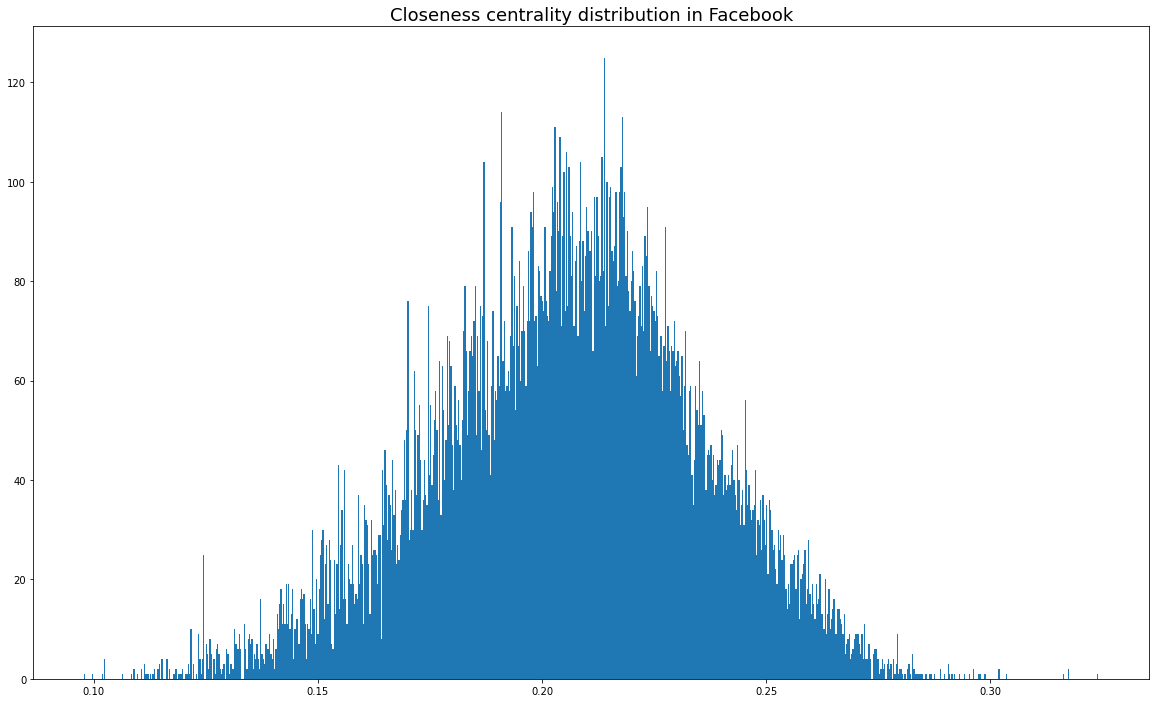

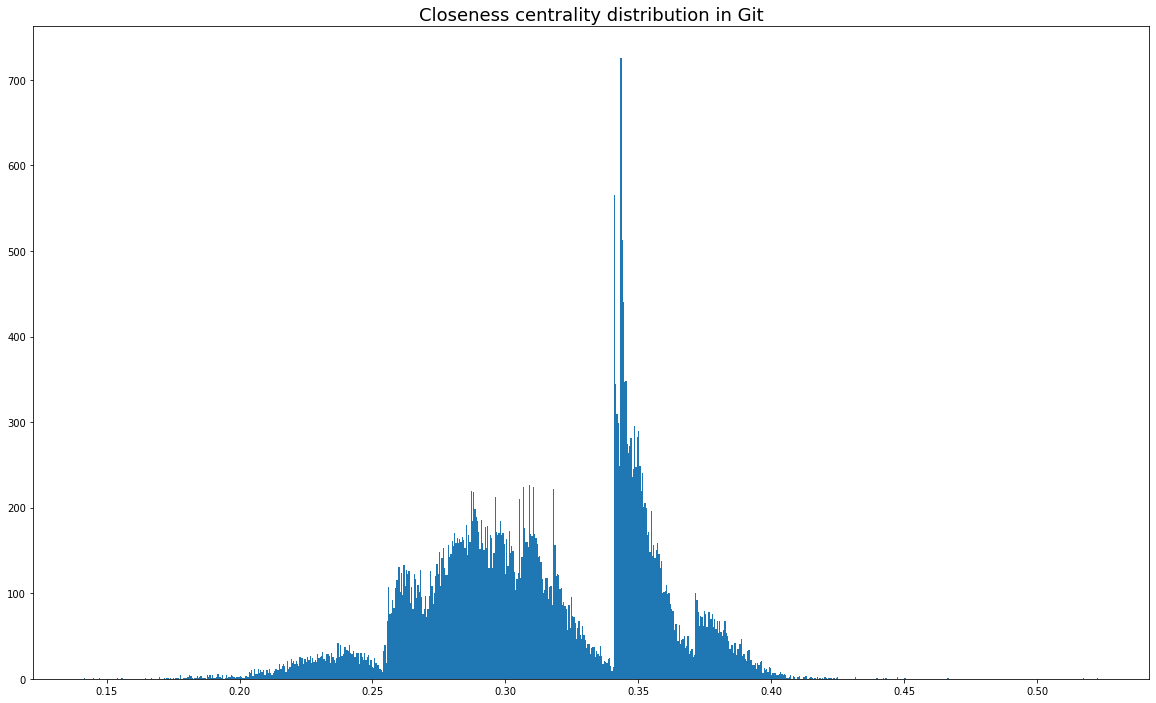

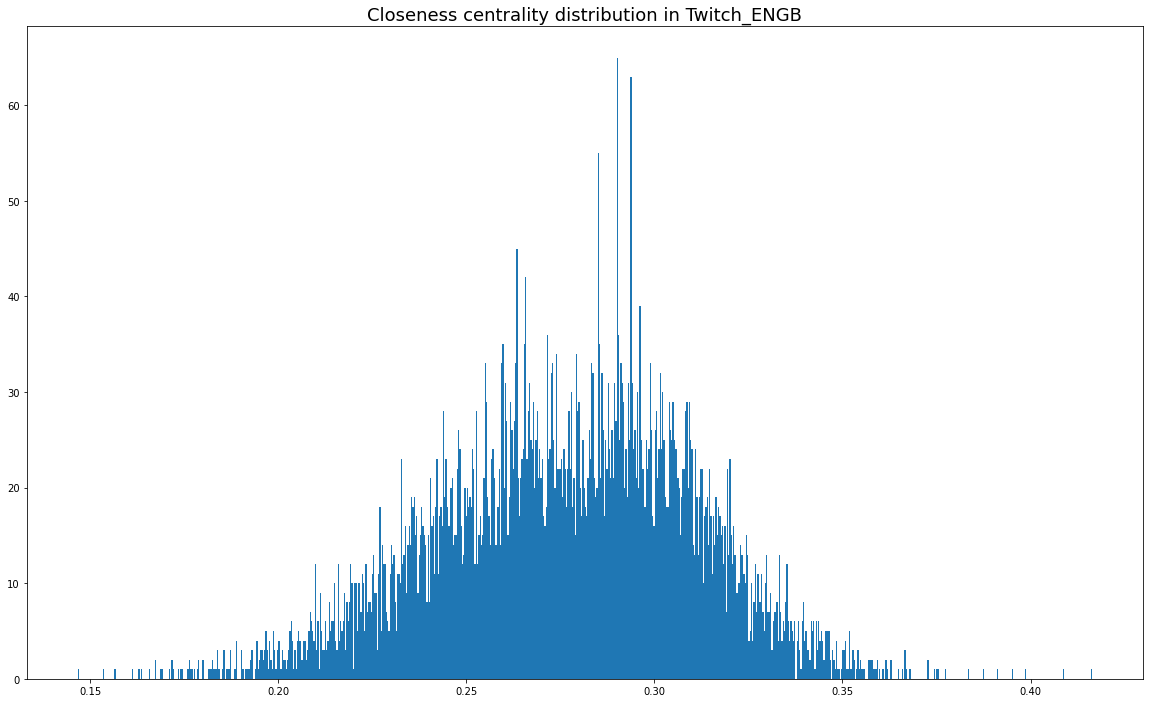

In [8]:
def plot_closeness_centrality_distribution(title, closeness_centrality):
    """
    Plot the distribution of the closeness centrality
    :param title: the title of the plot
    :param size: the size of the subgraph
    """
    # set the plot parameters
    plt.rcParams['figure.figsize'] = [20, 12]

    # Compute the degree centrality of G: deg_cent
    closeness_centralities = list(closeness_centrality.values())

    # Plot a histogram of the degree centrality distribution of the graph
    plt.hist(closeness_centralities, bins=800)

    # Set the plot title
    plt.title(title, fontsize=18)

    # Draw the plot
    plt.show()

for graph in Graphs:
    name = graph.name
    plot_closeness_centrality_distribution(f'Closeness centrality distribution in {name}', closeness_centralities[name])

## Community Detection

This part of the notebook will delve into the study of communities of the Facebook graph. In particular we will analyze and compare two different community detection algorithms:
* __Louvain Community detection__: It is an heuristic method based on modularity optimization. The quality of the partitions is measured in terms of a metric called $modularity$ $\in[-1,1]$ that measures the relative density of edges inside communities with respect to edges outside communities, and is the value to be optimized. For undirected, unweighted networks $G=(V, E)$ (as in our case) the $modularity$ of the graph is defined as:

    $Q = \frac{1}{2m} \sum_{i,j \in V} [A_{ij} - \frac{d_i d_j}{2m}] \delta (c_i, c_j)$

    where:
    - $m = |E|$
    - $A_{ij}$ is the value of the adjacency matrix of $G$.
    - $d_i, d_j$ is the degree of node $i$ and $j$.
    - $c_i, c_j$ are the communities of node $i$ and $j$ respectively.
    - $\delta(x, y)$ is the Kronecker delta function that is equal to $1$ if $x = y$ and $0$ otherwise.

    The Louvain method consists of two phases. Initially, each node is assigned to its own community. Subsequently, for each node, the algorithm attempts to identify the highest positive modularity gain by relocating the node to its neighboring communities. If no positive gain is achieved, the node remains in its original community. This process continues until further improvement is not possible. In the second phase, a new weighted graph is constructed, where weights of connections among newly added nodes are determined by summing the weights of connections between nodes in their respective communities. This allows the reapplication of the initial phase, forming larger communities with improved modularity. These two phases are iterated until no further modularity gain is obtained (or falls below a given threshold) 

* __Clauset-Newman-Moore greedy modularity maximization__: The algorithm starts with each node in its own community. Subsequently, we join pairs of communities that lead to the largest modularity until no further increase in modularity is possible.

Both algorithms require a parameter called _resolution_ that if it is less than 1, the algorithm favors larger communities. Greater than 1 favors smaller communities. We will try different values of the _resolution_.

The idea behind the analysis is to find the optimal number of communities in the graphs, using the $modularity$ as a metric. We also want to visualize the partition of the graph in the optimal result and comparing execution time of the algorithms.

We start by analing the Louvain community detection, trying different values of the resolution. But first we need to define some useful functions that we will need later.



In [9]:
import time
import numpy as np


def plot_x_y(x, y, title='Bar Graph', xlabel='X-axis', ylabel='Y-axis'):
    """
    Plot a bar graph of y that is a dictionary of lists of y values.

    Parameters:
    - x: List or array-like object representing the x-values.
    - y: dictionary containing the y values for all the elements.
    - title: Title of the bar graph (default is 'Bar Graph').
    - xlabel: Label for the x-axis (default is 'X-axis').
    - ylabel: Label for the y-axis (default is 'Y-axis').

    Returns:
    - None
    """
    # Check if the length of x matches the number of bars for each category in y
    num_bars = len(list(y.values())[0])
    if len(x) != num_bars:
        raise ValueError("Length of x must match the number of bars for each category in y.")

    # Create figure and axis
    fig, ax = plt.subplots()

    # modify the dimensions of the figure
    fig.set_figheight(10)
    fig.set_figwidth(15)

    # Set labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)

    # Set the positions for each bar
    bar_positions = np.arange(num_bars)

    # Set the width of the bars
    bar_width = 0.2  # Adjust as needed

    # Plot each set of bars
    for i, (label, values) in enumerate(y.items()):
        ax.bar(bar_positions + i * bar_width, values, width=bar_width, label=label)

    # Set x-axis ticks and labels
    ax.set_xticks(bar_positions + (len(y) - 1) * bar_width / 2)
    ax.set_xticklabels(x)

    # Add legend
    ax.legend()

    # Show the plot
    plt.show()
    

Now we will test different values of the resolution. We know that if the resolution is less than 1, the algorithm favors larger communities, while Greater than 1 favors smaller communities. We also study the running time and we will visualize the result of the best partitioning.

Running louvain_communities on Facebook
Resolution: 0.1
Number of communities k = 32
Modularity: 0.6812208777753631

Resolution: 0.2
Number of communities k = 36
Modularity: 0.7202248776328849

Resolution: 0.35
Number of communities k = 39
Modularity: 0.744235219220567

Resolution: 0.5
Number of communities k = 42
Modularity: 0.7540117788946424

Resolution: 0.8
Number of communities k = 48
Modularity: 0.7883036133899806

Resolution: 1.0
Number of communities k = 53
Modularity: 0.7949241133511842

Resolution: 1.5
Number of communities k = 61
Modularity: 0.7890537530812205

Resolution: 3.0
Number of communities k = 79
Modularity: 0.7643409241938227

Resolution: 5.0
Number of communities k = 98
Modularity: 0.7189502621242907

Resolution: 10.0
Number of communities k = 149
Modularity: 0.6516841541862907

Average running time: 1.4334647417068482

Running louvain_communities on Git
Resolution: 0.1
Number of communities k = 4
Modularity: 9.824630337748207e-05

Resolution: 0.2
Number of commun

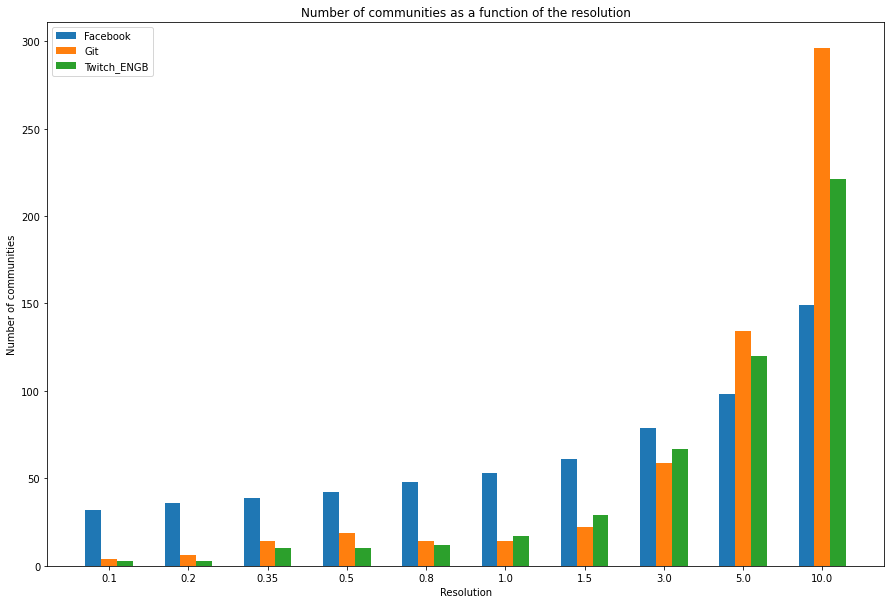

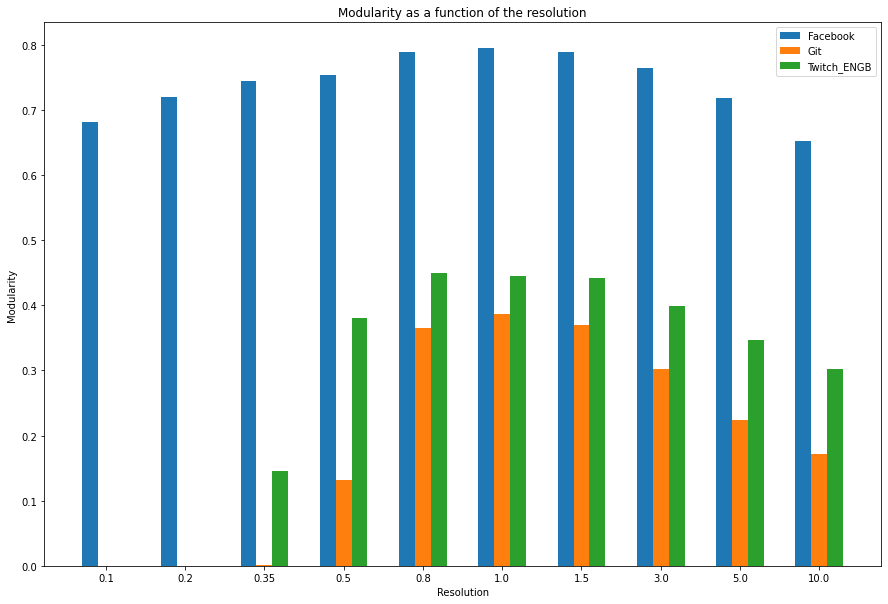

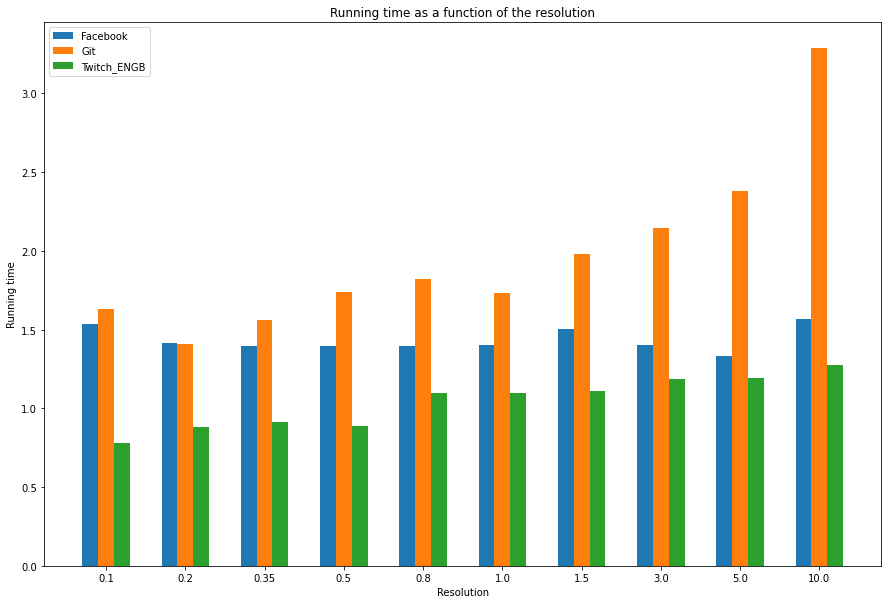

In [10]:
RESOLUTIONS = [0.1, 0.2, 0.35, 0.5, 0.8, 1.0, 1.5, 3.0, 5.0, 10.0]

sub_size = 5000
sub_graphs = [Facebook.subgraph(list(Facebook.nodes())[:sub_size]), Git.subgraph(list(Git.nodes())[:sub_size]), Twitch_ENGB.subgraph(list(Twitch_ENGB.nodes())[:sub_size])]

best_louvain_comm = dict()

def test_communities(G, func, dict_comm):
    """
    Find the communities of G using the algorithm func
    :param G: the graph
    :param func: the algorithm
    :param dict_comm: the dictionary of the best communities
    """
    print(f'Running {func.__name__} on {G.name}')

    total_time = 0
    max_modularity = -1
    times = []
    modularities = []
    num_communities = []
    best_comm = None
    for resolution in RESOLUTIONS:
        start = time.time()
        comm = func(G, resolution=resolution)
        end = time.time()

        modularity = nx.community.modularity(G, comm)

        print(f'Resolution: {resolution}')
        print(f'Number of communities k = {len(comm)}')
        print(f'Modularity: {modularity}\n')

        modularities.append(modularity)
        times.append(end - start)
        num_communities.append(len(comm))

        if modularity > max_modularity:
            max_modularity = modularity
            best_comm = comm

        total_time += end - start
    

    dict_comm[G.name] = best_comm
    print(f'Average running time: {total_time / len(RESOLUTIONS)}\n')
    # plot_communities(G, best_comm, f'{G.name} communities', 0.8, in_scale=0.07, out_scale=0.3, node_size=10)

    return num_communities, modularities, times

num_communities, modularities, times = dict(), dict(), dict()
for graph in sub_graphs:
    num_communities[graph.name], modularities[graph.name], times[graph.name] = test_communities(graph, nx.algorithms.community.louvain_communities, best_louvain_comm)

plot_x_y(RESOLUTIONS, num_communities, 'Number of communities as a function of the resolution', 'Resolution', 'Number of communities')
plot_x_y(RESOLUTIONS, modularities, 'Modularity as a function of the resolution', 'Resolution', 'Modularity')
plot_x_y(RESOLUTIONS, times, 'Running time as a function of the resolution', 'Resolution', 'Running time')

Running greedy_modularity_communities on Facebook
Resolution: 0.1
Number of communities k = 31
Modularity: 0.05631989787959016

Resolution: 0.2
Number of communities k = 43
Modularity: 0.2215830447048838

Resolution: 0.35
Number of communities k = 52
Modularity: 0.5061030867448966

Resolution: 0.5
Number of communities k = 48
Modularity: 0.5670987170303632

Resolution: 0.8
Number of communities k = 57
Modularity: 0.6034831151833561

Resolution: 1.0
Number of communities k = 51
Modularity: 0.7322411540189977

Resolution: 1.5
Number of communities k = 63
Modularity: 0.7481303438029424

Resolution: 3.0
Number of communities k = 73
Modularity: 0.7681587361597253

Resolution: 5.0
Number of communities k = 93
Modularity: 0.7229851837553165

Resolution: 10.0
Number of communities k = 139
Modularity: 0.6553815047293581

Average running time: 31.688319396972656

Running greedy_modularity_communities on Git
Resolution: 0.1
Number of communities k = 4
Modularity: 9.824630337748207e-05

Resolution

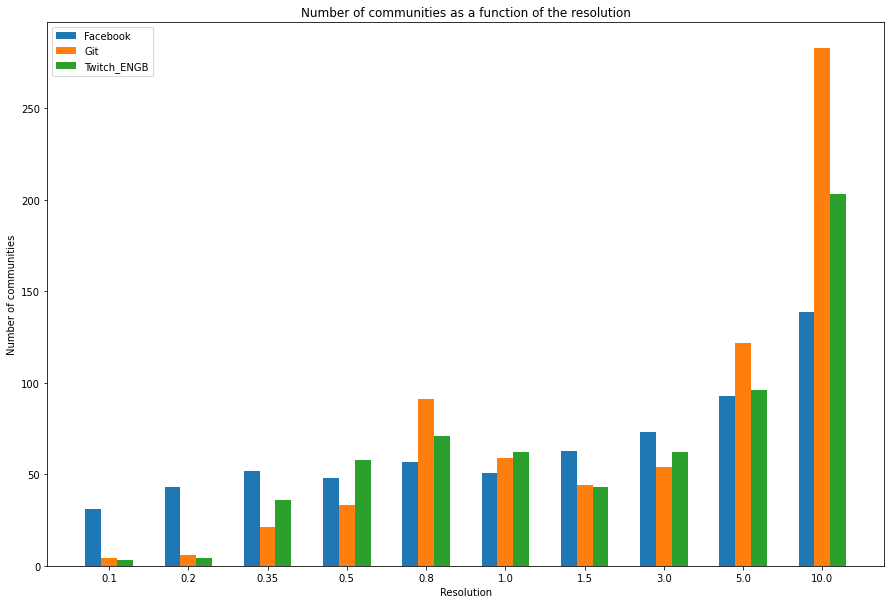

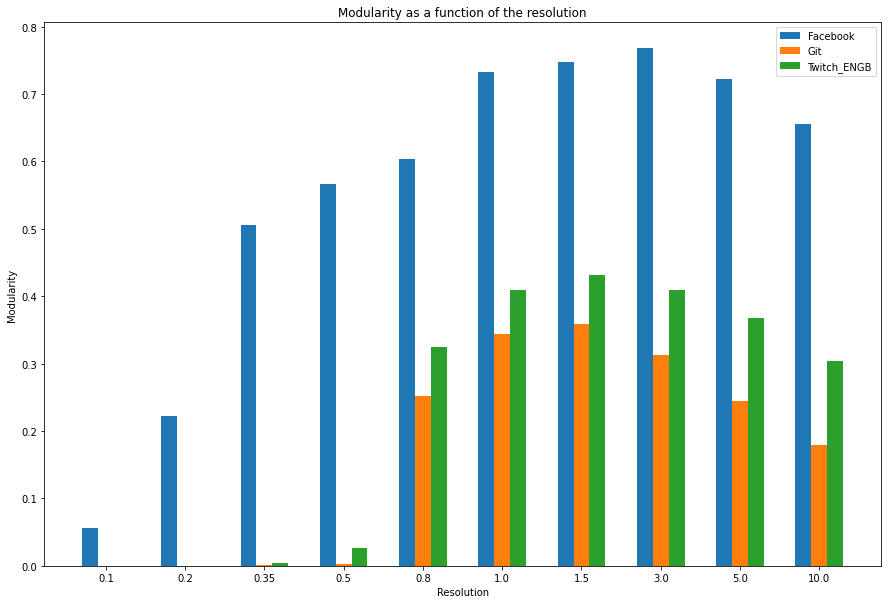

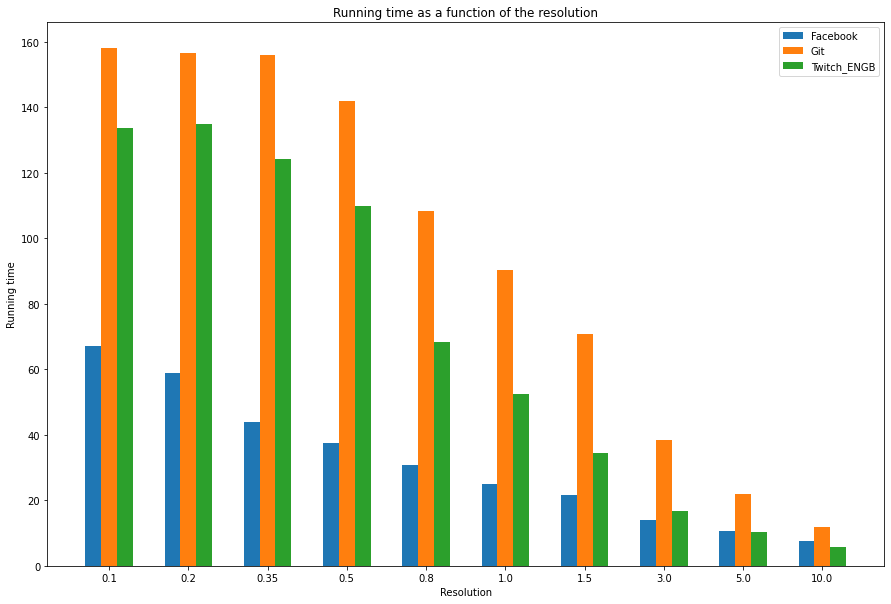

In [11]:
best_greedy_comm = dict()

num_communities, modularities, times = dict(), dict(), dict()
for graph in sub_graphs:
    num_communities[graph.name], modularities[graph.name], times[graph.name] = test_communities(graph, nx.algorithms.community.greedy_modularity_communities, best_greedy_comm)

plot_x_y(RESOLUTIONS, num_communities, 'Number of communities as a function of the resolution', 'Resolution', 'Number of communities')
plot_x_y(RESOLUTIONS, modularities, 'Modularity as a function of the resolution', 'Resolution', 'Modularity')
plot_x_y(RESOLUTIONS, times, 'Running time as a function of the resolution', 'Resolution', 'Running time')

### Analysis of the communities

Now that we obtained two different partitioning for each graphs, with high modularity, we can start analyzing and compare them.

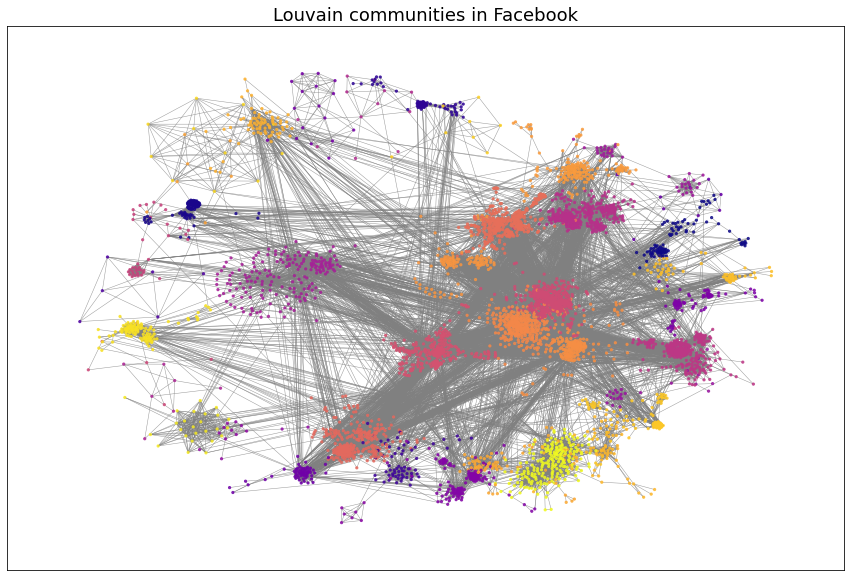

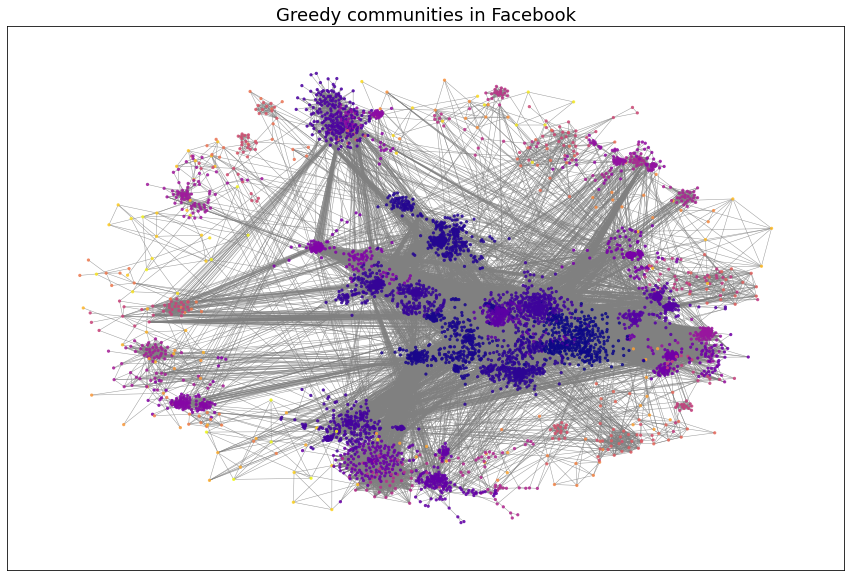

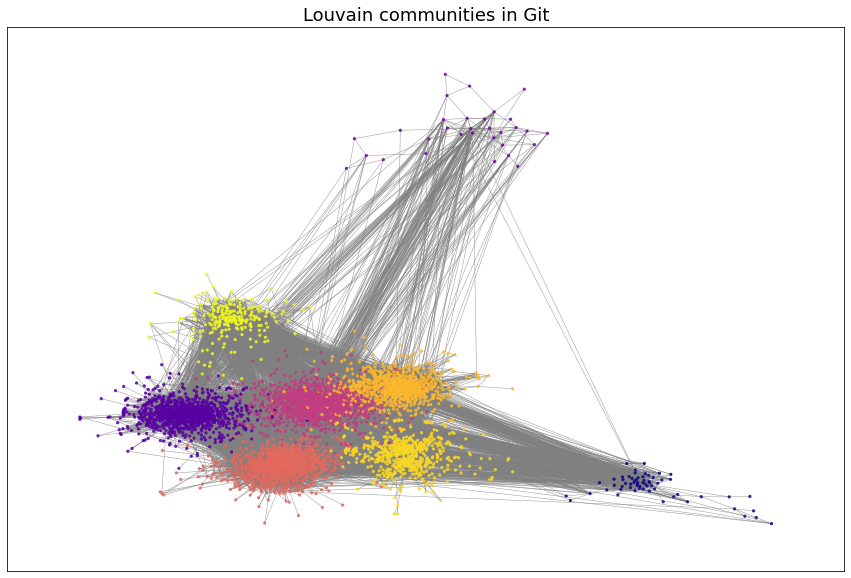

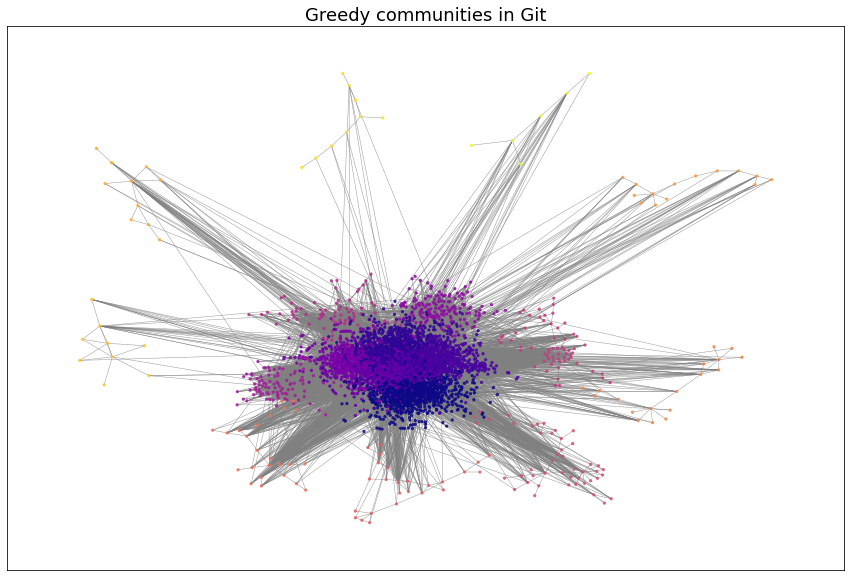

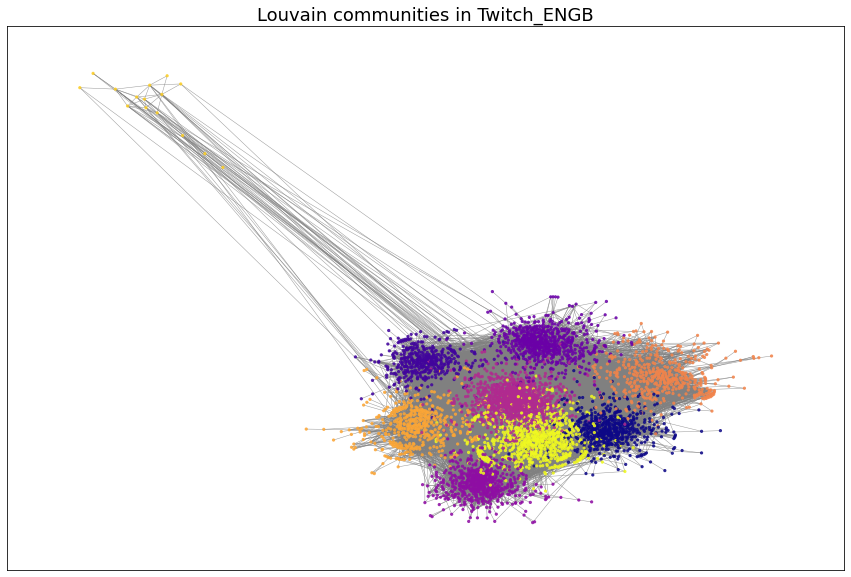

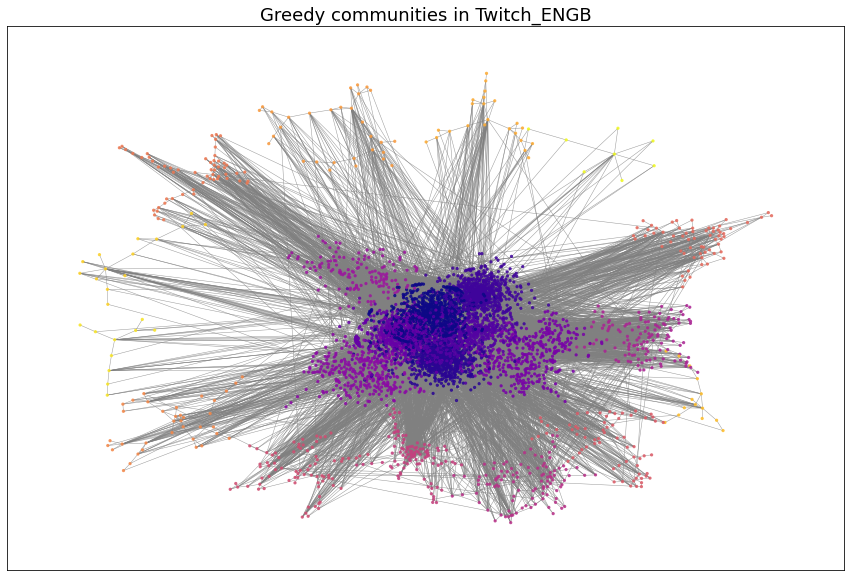

In [65]:
def find_index_partion(partition, node):
    """
    Find the index of the community to which the node belongs
    :param partition: the partition
    :param node: the node
    :return: the index of the community
    """
    for index,community in enumerate(partition):
        if  node in community:
            return index

def community_layout(g, partition, in_scale=1, out_scale=9):
    pos_communities = _position_communities(g, partition, out_scale=out_scale)

    pos_nodes = _position_nodes(g, partition, in_scale=in_scale)

    # combine positions
    pos = dict()
    for node in g.nodes():
        pos[node] = pos_communities[node] + pos_nodes[node]

    return pos

def _position_communities(g, partition, out_scale=9):
    # create a weighted graph, in which each node corresponds to a community,
    # and each edge weight to the number of edges between communities
    between_community_edges = _find_between_community_edges(g, partition)

    communities = set(range(len(partition)))
    hypergraph = nx.DiGraph()
    hypergraph.add_nodes_from(communities)

    for (ci, cj), edges in between_community_edges.items():
        hypergraph.add_edge(ci, cj, weight=len(edges))

    # find layout for communities
    pos_communities = nx.spring_layout(hypergraph, scale=out_scale, k=5, seed=88489)#########0.85

    # set node positions to position of community
    pos = dict()
    """for node, community in partition.items():
        pos[node] = pos_communities[community]"""
    for i, community in enumerate(partition):
        for node in community:
            pos[node] = pos_communities[i]

    return pos

def _find_between_community_edges(g, partition):
    edges = dict()

    for (ni, nj) in g.edges():
        ci = find_index_partion(partition, ni)
        cj = find_index_partion(partition, nj)

        if ci != cj:
            try:
                edges[(ci, cj)] += [(ni, nj)]
            except KeyError:
                edges[(ci, cj)] = [(ni, nj)]

    return edges

def _position_nodes(g, partition, in_scale=1):
    communities = dict()
    for i, community in enumerate(partition):
        for node in community:
            try:
                communities[i] += [node]
            except KeyError:
                communities[i] = [node]

    pos = dict()
    for ci, nodes in communities.items():
        subgraph = g.subgraph(nodes)
        pos_subgraph = nx.spring_layout(subgraph, scale=in_scale)
        pos.update(pos_subgraph)

    return pos

def assign_colors_to_communities(G, communities):
    """
    Assign a color to each community
    :param G: the graph
    :param communities: the communities
    :return: a list of colors
    """
    colors = []
    for node in G:
        for index,community in enumerate(communities):
            if  node in community:
                colors.append(index)
    return colors

def plot_communities(G, communities, title, perc_nodes, in_scale=1, out_scale=9, node_size=40):
    """
    Plot a subgraph of G in which nodes are colored according to the community they belong to
    :param G: the graph
    :param communities: the communities
    :param title: the title of the plot
    :param perc_nodes: the percentage of nodes to plot
    """
    F = G.subgraph(list(G.nodes())[:int(len(G) * perc_nodes)])
    
    # remove the self loops in F
    F = nx.Graph(F)
    F.remove_edges_from(nx.selfloop_edges(F))
    
    # remove communities with less than 3 nodes
    comm = []
    for community in communities:
        if len(community) > 5:
            comm.append(community)
        else:
            for node in community:
                if node in F:
                    F.remove_node(node)

    pos = community_layout(F, comm, in_scale=in_scale, out_scale=out_scale)

    plt.rcParams['figure.figsize'] = [15, 10]

    # draw the nodes and the edges (all)
    node_color = assign_colors_to_communities(F, communities)

    nx.draw_networkx(F, pos=pos, width=0.5, node_color=node_color, edge_color='grey', with_labels=False, alpha=0.8, node_size=node_size, cmap=plt.cm.plasma)

    plt.title(title, fontsize=18)
    plt.axis('on')
    plt.show()

for graph in sub_graphs:
    name = graph.name
    plot_communities(graph, best_louvain_comm[name], f'Louvain communities in {name}', 1.0, in_scale=0.07, out_scale=0.3, node_size=5)
    plot_communities(graph, best_greedy_comm[name], f'Greedy communities in {name}', 1.0, in_scale=0.07, out_scale=0.3, node_size=5)

Now we analyze the size of the communities.

In [13]:
communitie_data_frame = pd.DataFrame(columns=['Graph', 'Alg' ,'# communities', 'Modularity', 'Max community size', 'Min community size', 'Avg community size', 'Std of the community size'])

for graph in sub_graphs:
    # Analysis of Louvan communities
    name = graph.name
    communities = best_louvain_comm[name]
    num_communities = len(communities)
    modularity = nx.community.modularity(graph, communities)
    community_sizes = [len(community) for community in communities]
    max_community_size = max(community_sizes)
    min_community_size = min(community_sizes)
    avg_community_size = sum(community_sizes) / len(communities)
    std_community_size = np.std(community_sizes)

    communitie_data_frame = pd.concat([communitie_data_frame, pd.DataFrame({'Graph': name, 'Alg': 'Louvain', '# communities': num_communities, 'Modularity': modularity, 'Max community size': max_community_size, 'Min community size': min_community_size, 'Avg community size': avg_community_size, 'Std of the community size': std_community_size}, index=[0])], ignore_index=True)


    # Analysis of Greedy communities
    communities = best_greedy_comm[name]
    num_communities = len(communities)
    modularity = nx.community.modularity(graph, communities)
    community_sizes = [len(community) for community in communities]
    max_community_size = max(community_sizes)
    min_community_size = min(community_sizes)
    avg_community_size = sum(community_sizes) / len(communities)
    std_community_size = np.std(community_sizes)
   
    communitie_data_frame = pd.concat([communitie_data_frame, pd.DataFrame({'Graph': name, 'Alg': 'Greedy', '# communities': num_communities, 'Modularity': modularity, 'Max community size': max_community_size, 'Min community size': min_community_size, 'Avg community size': avg_community_size, 'Std of the community size': std_community_size}, index=[0])], ignore_index=True)

print(communitie_data_frame.to_string(index=False, col_space=16, justify='center'))

     Graph             Alg         # communities      Modularity    Max community size Min community size Avg community size Std of the community size
     Facebook        Louvain             53            0.794924             545                2               94.339623             129.951071       
     Facebook         Greedy             73            0.768159             394                2               68.493151             105.403481       
          Git        Louvain             14            0.387334            1242                2              357.142857             455.207466       
          Git         Greedy             44            0.359458            1028                1              113.636364             278.714182       
  Twitch_ENGB        Louvain             12             0.44921            1038                2              416.666667             328.792826       
  Twitch_ENGB         Greedy             43            0.431743             811               